In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


def vector_poten(A0, omega, t):
    """
    Vector potential.
    A0 = c*E_0 / omega
    """
    a = np.zeros((2))
    a[0] = A0*np.cos(omega*t)
    a[1] = -A0*np.sin(omega*t)
    return a
    
def k_PS(A, omega, k, t):
    """
    Peierls substitution!
    
    A = e*E_0 / omega
    """
    k[0] = k[0]-A*np.cos(omega*t)
    k[1] = k[1]+A*np.sin(omega*t)
    return k

def g_K(A, omega, k, t, tau):
    """
    Diagonal elements of the TS Hamiltonian. 
    """
    k_ps = k_PS(A, omega, k, t)
    c1 = np.array([-np.sqrt(3)/2, -0.5])
    c2 = np.array([np.sqrt(3)/2, -0.5])
    c3 = np.array([0., 1.])
    return -tau*(np.exp(1j*np.dot(k_ps,c1)) + np.exp(1j*np.dot(k_ps,c2)) + np.exp(1j*np.dot(k_ps,c3)))

def Epsilon_K(g):
    e = np.zeros((2,2))
    e[0,0] = np.abs(g)
    e[1,1] = -np.abs(g)
    return e

def berry_conn(A, omega, k, t, tau):
    """
    Berry conenction. 
    """
    conn = 0.5*np.ones((2,2))
    dt = 2*np.pi/(omega*50000)
    g = g_K(A, omega, k, t, tau)
    g_dt = g_K(A, omega, k, t+dt, tau)
    d_Phi = 1j*(np.log(g_dt/np.abs(g_dt)) - np.log(g/np.abs(g)))/dt
    
    return d_Phi*conn
        
def zak_Phase(A, omega, k, tau):
    """
    Zak phase.
    """
    dt = 2*np.pi/(omega*50000)
    phase = 0.
    for t in np.linspace(0., 2*np.pi/omega, 50000):
        b_conn = berry_conn(A, omega, k, t, tau)
        phase = phase - dt*b_conn[0,0]
    phase = phase*omega
    return phase

def eps_WSL_n(A, k, tau, omega, n, zak_phase, sign):
    dt = 2*np.pi/(omega*50000)
    e_bar = 0.0
    for t in np.linspace(0., 2*np.pi/omega, 50000):
        e_bar = e_bar - dt*sign*np.abs(g_K(A, omega, k, t, tau))
    e_bar = e_bar*omega/(2*np.pi)
    return e_bar + omega*(n + zak_phase/(2*np.pi))

def plot_surface_3d(n, nx, ny, energy):
    """
    Make 3D surface plot of BZ.
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.linspace(-np.pi, np.pi, nx)
    Y = np.linspace(-np.pi, np.pi, ny)
    X, Y = np.meshgrid(X, Y)
    Z = np.ones((nx,ny))
    count = 0
    for i in range(nx):
        for j in range(ny):
            Z[i,j] = Z[i,j]*energy[count]
            count+=1


    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(np.min(energy)-0.02, np.max(energy)+0.02)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title("n="+str(n))
    plt.savefig("n_"+str(n)+".pdf")
    plt.show()
    

In [ ]:
A = 0.8
omega = 0.005
tau = 0.01
n = 0.0


energy = []
kx = []
ky = []
zak = []
nx = 50
ny = 50

for i in np.linspace(-np.pi, np.pi, nx):
    for j in np.linspace(-np.pi, np.pi, ny):
        k = np.array([i, j])
#         z_phase = zak_Phase(A, omega, k, tau)
#         zak.append(z_phase)
        e = eps_WSL_n(A, k, tau, omega, n, 0., +1)
        energy.append(e)
        print(e)
        if np.abs(e) <= 0.005:
            kx.append(i)
            ky.append(j)
np.savetxt('zak_n_' + str(n) + '.txt', zak)
np.savetxt('e_n_' + str(n) + '.txt', energy)
np.savetxt('kx_n_' + str(n) + '.txt', kx)
np.savetxt('ky_n_' + str(n) + '.txt', ky)

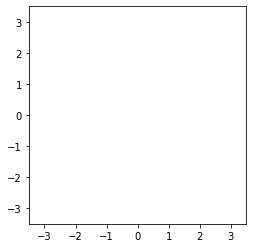

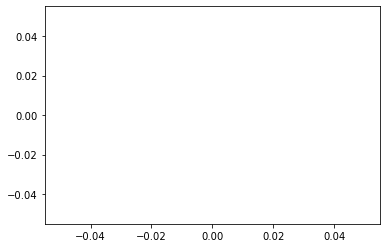

In [10]:
import matplotlib.pyplot as plt
# b = np.max(energy)
# print(b)
# k_x_y = np.ones((1000,1000))
# x = 0
# y = 0
# for i in np.linspace(-np.pi, np.pi, 1000):
#     for j in np.linspace(-np.pi, np.pi, 1000):
#         k_x_y[x,y] = np.sqrt(i**2 + j**2)
        
fig = plt.figure()
ax = fig.add_subplot(111)     
plt.plot(kx, ky, '*')
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
ax.set_aspect('equal', adjustable='box')
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)     
plt.plot(zak, '*')
plt.show()


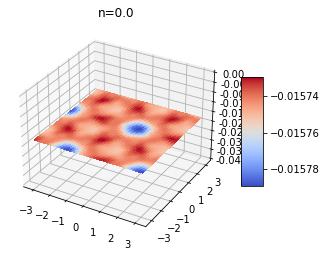

6.082999725660551e-05


In [11]:
plot_surface_3d(n, nx, ny, energy)

print(np.max(energy)-np.min(energy))

In [2]:
ener = np.loadtxt('./pc60_runs/out/zak.txt')

ValueError: could not convert string to float: '(-8.885098270793623243e-01-5.415202931218435019e-17j)'

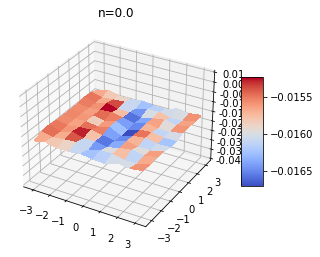

0.003186467084205259


In [17]:
plot_surface_3d(0., 10, 10, ener)

print(np.max(ener)-np.min(ener))